In [69]:
print('hello world')

hello world


<AxesSubplot:xlabel='Effort', ylabel='Precision'>

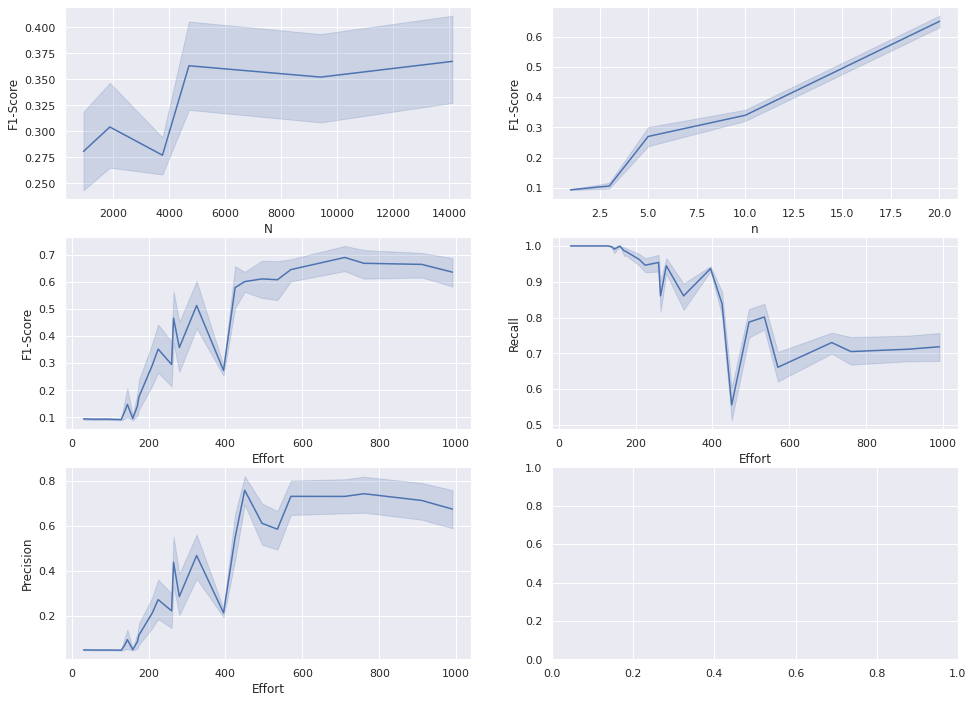

In [54]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")
datapath = '/home/ec2-user/SageMaker/mariano/datasets/20news-18828/simulation_results/all_results.csv'
df = pd.read_csv(datapath)

# Plot the responses for different events and regions
fig,ax=plt.subplots(3,2, figsize=(16,12))
sns.lineplot(x="N", y="F1-Score", ax=ax[0,0],
             #hue="region", style="event",
             data=df)

sns.lineplot(x="n", y="F1-Score", ax=ax[0,1],
             #hue="region", style="event",
             data=df)
sns.lineplot(x="Effort", y="F1-Score", ax=ax[1,0],
             #hue="region", style="event",
             data=df)

sns.lineplot(x="Effort", y="Recall", ax=ax[1,1],
             #hue="region", style="event",
             data=df)

sns.lineplot(x="Effort", y="Precision", ax=ax[2,0],
             #hue="region", style="event",
             data=df)

In [67]:
df

,Date,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,category,representation
0,2022-11-17 16:51,9960,logreg,relevance,20newsgroup,941,1,31,0.042137,0.042137,1.000000,0.080866,7,792,0,18004,0,0.031243,alt.atheism,bow
1,2022-11-17 16:51,1846,logreg,relevance,20newsgroup,941,1,31,0.051500,0.051500,1.000000,0.097956,5,968,0,17828,0,0.055792,comp.graphics,bow
2,2022-11-17 16:51,15309,logreg,relevance,20newsgroup,941,1,31,0.052032,0.052032,1.000000,0.098918,7,978,0,17818,0,0.047981,comp.os.ms-windows.misc,bow
3,2022-11-17 16:52,16507,logreg,relevance,20newsgroup,941,1,31,0.052192,0.052192,1.000000,0.099206,1,981,0,17815,0,0.000000,comp.sys.ibm.pc.hardware,bow
4,2022-11-17 16:52,20740,logreg,relevance,20newsgroup,941,1,31,0.050649,0.050649,1.000000,0.096415,9,952,0,17844,0,0.068066,comp.sys.mac.hardware,bow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2022-11-21 19:48,22331,svm,relevance,20newsgroup,3761,10,395,0.419813,0.047449,0.939823,0.090337,63,531,7207,10660,34,0.033753,talk.religion.misc,sbert
1796,2022-11-21 19:49,9920,svm,relevance,20newsgroup,3761,10,395,0.166938,0.035797,0.996503,0.069112,56,570,2507,15353,2,0.051621,talk.religion.misc,sbert
1797,2022-11-21 19:50,5681,svm,relevance,20newsgroup,3761,10,395,0.279785,0.040379,0.975524,0.077548,56,558,4599,13261,14,0.035903,talk.religion.misc,sbert
1798,2022-11-21 19:50,1187,svm,relevance,20newsgroup,3761,10,395,0.072049,0.033510,0.998316,0.064844,34,593,735,17103,1,0.029984,talk.religion.misc,sbert


In [64]:
for p in [0.05, 0.1, 0.2, 0.25, 0.5 , 0.75]:
    print(int(18828*p))

941
1882
3765
4707
9414
14121


In [58]:
mask = (df['N']==3761) & (df['n']==10)
import numpy as np
np.sum(mask)

640

(640, 20)


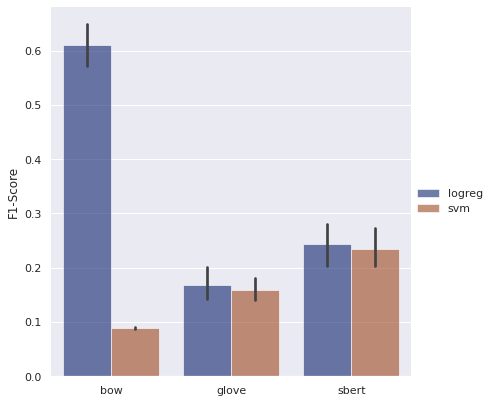

In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")
datapath = '/home/ec2-user/SageMaker/mariano/datasets/20news-18828/simulation_results/all_results.csv'
df = pd.read_csv(datapath)


mask = (df['N']==3761) & (df['n']==10)
print(df[mask].shape)

# fig,ax=plt.subplots(1, figsize=(16,12))
g = sns.catplot(
    data=df[mask], kind="bar",
    x="representation", y="F1-Score", hue="Model",
    palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("", "F1-Score")
g.legend.set_title("")

In [43]:
df.iloc[-600:,:]

,Date,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,category,representation
1200,2022-11-21 13:03,28864,logreg,relevance,20newsgroup,3761,10,395,0.721408,0.118790,0.987143,0.212061,99,691,12606,5126,9,0.049973,alt.atheism,bow
1201,2022-11-21 13:04,21341,logreg,relevance,20newsgroup,3761,10,395,0.921766,0.318627,0.925926,0.474106,97,650,16340,1390,52,0.045730,alt.atheism,bow
1202,2022-11-21 13:04,15948,logreg,relevance,20newsgroup,3761,10,395,0.976562,0.674359,0.747159,0.708895,95,526,17474,254,178,0.044529,alt.atheism,bow
1203,2022-11-21 13:05,1555,logreg,relevance,20newsgroup,3761,10,395,0.774577,0.140274,0.974026,0.245232,106,675,13602,4137,18,0.060136,alt.atheism,bow
1204,2022-11-21 13:05,19193,logreg,relevance,20newsgroup,3761,10,395,0.977702,0.745066,0.638928,0.687927,90,453,17568,155,256,0.037271,alt.atheism,bow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2022-11-21 19:48,22331,svm,relevance,20newsgroup,3761,10,395,0.419813,0.047449,0.939823,0.090337,63,531,7207,10660,34,0.033753,talk.religion.misc,sbert
1796,2022-11-21 19:49,9920,svm,relevance,20newsgroup,3761,10,395,0.166938,0.035797,0.996503,0.069112,56,570,2507,15353,2,0.051621,talk.religion.misc,sbert
1797,2022-11-21 19:50,5681,svm,relevance,20newsgroup,3761,10,395,0.279785,0.040379,0.975524,0.077548,56,558,4599,13261,14,0.035903,talk.religion.misc,sbert
1798,2022-11-21 19:50,1187,svm,relevance,20newsgroup,3761,10,395,0.072049,0.033510,0.998316,0.064844,34,593,735,17103,1,0.029984,talk.religion.misc,sbert
